In [3]:
 import pandas as pd
 import numpy as np

In [5]:
names = pd.read_csv('data/kddcup.names', header=None, delimiter=':',skiprows=1)
# make column 0 into a list
name_list = names[0].tolist()

# add the last column with type
name_list.append('type')

print(name_list)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'type']


In [7]:
netattacks = pd.read_csv('data/kddcup.data_10_percent_corrected', names=name_list, header=None, index_col=None)

netattacks.head()

netattacks.describe(include='all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,type
count,494021.000000,494021,494021,494021,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021
unique,NaN,3,66,11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
top,NaN,icmp,ecr_i,SF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,smurf.
freq,NaN,283602,281400,378440,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280790
mean,47.979302,NaN,NaN,NaN,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,...,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412,NaN
std,707.746472,NaN,NaN,NaN,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,...,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140,NaN
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,NaN,NaN,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,NaN,NaN,NaN,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,NaN,NaN,NaN,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [8]:
# store stats in a dataframe
df_stats = netattacks.describe(include='all')
# save dataframe to file
df_stats.to_csv('netattack_summary.csv')

In [9]:
# The first two are good if you want other stats besides count
# e.g. mean or standard deviation
type_counts = netattacks.groupby('type').count()
type_means = netattacks.groupby('type').mean()

# get a multi-index with multiple stats
type_counts = netattacks.groupby('type').agg(['count', 'mean'])

# cleanest for just counts
type_counts = netattacks['type'].value_counts()
type_counts.head()

/var/folders/ll/5fnyw07s0p74sdfnrqqwwhgc0000gn/T/ipykernel_4540/344918713.py:7: FutureWarning: ['protocol_type', 'service', 'flag'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  type_counts = netattacks.groupby('type').agg(['count', 'mean'])


smurf.      280790
neptune.    107201
normal.      97278
back.         2203
satan.        1589
Name: type, dtype: int64

<AxesSubplot:>

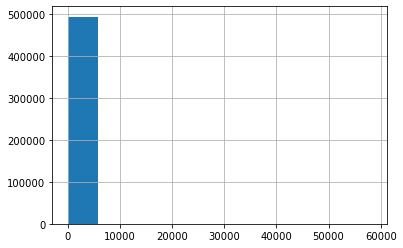

In [10]:
netattacks['duration'].hist()

<AxesSubplot:>

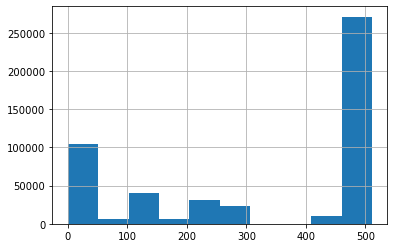

In [11]:
netattacks['count'].hist()

In [12]:
netattacks['duration'].corr(netattacks['count'])


-0.10515338141725332

In [13]:
netattacks.corr()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.004258,0.005440,-0.000452,-0.003235,0.003786,0.013213,0.005239,-0.017265,0.058095,...,0.010074,-0.117515,-0.118458,0.406233,0.042642,-0.006983,-0.030400,-0.030612,0.006739,0.010465
src_bytes,0.004258,1.000000,-0.000002,-0.000020,-0.000139,-0.000005,0.004483,-0.000027,0.001701,0.000119,...,-0.001743,-0.003212,-0.002052,0.000578,-0.000724,0.001186,-0.000718,0.001122,-0.000393,0.001328
dst_bytes,0.005440,-0.000002,1.000000,-0.000175,-0.001254,0.016288,0.004365,0.049330,0.047814,0.023298,...,-0.048869,-0.005850,0.007058,-0.005314,-0.020143,0.008707,-0.011334,-0.011235,-0.005000,-0.005471
land,-0.000452,-0.000020,-0.000175,1.000000,-0.000318,-0.000017,-0.000295,-0.000065,-0.002784,-0.000038,...,-0.023671,-0.011587,0.001984,-0.000333,0.003799,0.083320,0.012658,0.007795,-0.001511,-0.001665
wrong_fragment,-0.003235,-0.000139,-0.001254,-0.000318,1.000000,-0.000123,-0.002106,-0.000467,-0.019908,-0.000271,...,-0.005191,-0.058624,-0.054903,0.071857,-0.031803,0.012092,-0.019091,-0.022104,0.029774,-0.011904
urgent,0.003786,-0.000005,0.016288,-0.000017,-0.000123,1.000000,0.000356,0.141996,0.006164,0.014285,...,-0.007139,-0.004540,-0.003279,0.010536,-0.002002,-0.000408,-0.001194,-0.001191,-0.000648,-0.000641
hot,0.013213,0.004483,0.004365,-0.000295,-0.002106,0.000356,1.000000,0.008740,0.105305,0.007348,...,-0.026366,-0.038730,-0.029117,0.001319,-0.052923,-0.004467,-0.019491,-0.020201,-0.006541,-0.007749
num_failed_logins,0.005239,-0.000027,0.049330,-0.000065,-0.000467,0.141996,0.008740,1.000000,-0.001145,0.006907,...,-0.025444,-0.015413,0.000507,0.001017,-0.009565,0.016001,-0.001945,-0.002453,0.024753,0.023584
logged_in,-0.017265,0.001701,0.047814,-0.002784,-0.019908,0.006164,0.105305,-0.001145,1.000000,0.013612,...,-0.621029,0.119315,0.161070,-0.061151,-0.461558,0.140493,-0.190955,-0.191704,-0.090868,-0.087885
num_compromised,0.058095,0.000119,0.023298,-0.000038,-0.000271,0.014285,0.007348,0.006907,0.013612,1.000000,...,-0.008361,-0.004797,-0.002584,0.000359,-0.006715,0.000621,-0.001978,-0.001631,-0.000843,-0.000873


Break down into good or bad for each 

In [33]:
netattacks['label'] = np.where(netattacks['type'] == 'normal.', 'good', 'bad')
netattacks['label'].value_counts()



bad     396743
good     97278
Name: label, dtype: int64

In [26]:
netattacks['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

#Lab Excercise

1. Can you run correlations between continuous and categorical variables? Why or why not?
  a. No you cannot because to get correlations you need a mean and you can't get that from categorical variables

2. Run a correlation between two or more other variables in the dataset. What might you interpret from this?

In [14]:
netattacks['logged_in'].corr(netattacks['num_failed_logins'])

-0.0011446470071644023

a. There is a negative relation of logged in accounts and number of failed logins. which seems correct because there should be a negative relation between people who log in and didn't 

3. Summarize by protocol (protocol_type). Are there more attacks using TCP or UDP? (Hint: Group by two columns instead of one with .group_by(['A', 'B'])

In [55]:
by_protocol = netattacks.groupby("protocol_type")['label'].value_counts()
print(by_protocol)





protocol_type  label
icmp           bad      282314
               good       1288
tcp            bad      113252
               good      76813
udp            good      19177
               bad        1177
Name: label, dtype: int64


There are more TCP attacks then UDP attacks